# Application of Bagging on Titanic Dataset

## Data preparation

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("train.csv", header = 0)
test = pd.read_csv("test.csv", header = 0)

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Clean the data
From the following analysis we know there is only cabin feature has null values. I will use Imputer to handle those null values.

In [4]:
train.isnull().describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891,891
unique,1,1,1,1,1,2,1,1,1,1,2,2
top,False,False,False,False,False,False,False,False,False,False,True,False
freq,891,891,891,891,891,714,891,891,891,891,687,889


In [5]:
test.isnull().describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418,418,418,418,418,418,418,418,418,418,418
unique,1,1,1,1,2,1,1,1,2,2,1
top,False,False,False,False,False,False,False,False,False,True,False
freq,418,418,418,418,332,418,418,418,417,327,418


In [6]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer(strategy="most_frequent")
train['Cabin'].unique()

#Imputation for Cabin and Embarked
train_impute = pd.DataFrame(SI.fit_transform(train[["Cabin","Embarked"]]))
test_impute = pd.DataFrame(SI.transform(test[["Cabin" ,"Embarked"]]))

train[["Cabin","Embarked"]] = train_impute
test[["Cabin","Embarked"]] = test_impute

#Imputation for age and Fare
SI_num = SimpleImputer(strategy="mean")
train_impute = pd.DataFrame(SI_num.fit_transform(train[["Age","Fare"]]))
test_impute = pd.DataFrame(SI_num.transform(test[["Age" ,"Fare"]]))

train[["Age" ,"Fare"]] = train_impute
test[["Age" ,"Fare"]] = test_impute

## Handle Categorital features

In [8]:
handle_train = train.drop('Survived', axis = 1)
feature_ob = (handle_train.dtypes == object)
feature_ob

PassengerId    False
Pclass         False
Name            True
Sex             True
Age            False
SibSp          False
Parch          False
Ticket          True
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
# Select types
train_obj = handle_train.iloc[:,feature_ob.values]
test_obj = test.iloc[:,feature_ob.values]

train_obj.describe().loc['unique']

#From the unique value, we can use OneHotEncoder for Sex and Embarked and Label Encoding for Ticket and Cabin

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
Name: unique, dtype: object

## OneHotEncoding

In [10]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)

train_onehot = pd.DataFrame(OHE.fit_transform(handle_train[['Sex']]), columns = OHE.get_feature_names())
test_onehot = pd.DataFrame(OHE.transform(test[['Sex']]), columns = OHE.get_feature_names())

train_new = pd.concat([handle_train.drop(['Sex'], axis = 1), train_onehot], axis = 1)
test_new= pd.concat([test.drop(['Sex'], axis = 1), test_onehot], axis = 1)

## Categorical Encoding

In [11]:
import category_encoders as ce
le = ce.OrdinalEncoder()
train_new[["Ticket",'Cabin', 'Embarked']] =  le.fit_transform(handle_train[["Ticket",'Cabin', 'Embarked']])
test_new[["Ticket",'Cabin', 'Embarked']] =  le.transform(handle_train[["Ticket",'Cabin', 'Embarked']])

In [21]:
train_new.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,x0_female,x0_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,1,7.2500,1,1,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,2,71.2833,2,2,1.0,0.0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,3,7.9250,1,1,1.0,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,4,53.1000,3,1,1.0,0.0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,5,8.0500,1,1,0.0,1.0


## Feature Selection

Index(['Age', 'Ticket', 'x0_female', 'Fare', 'x0_male', 'Pclass'], dtype='object')


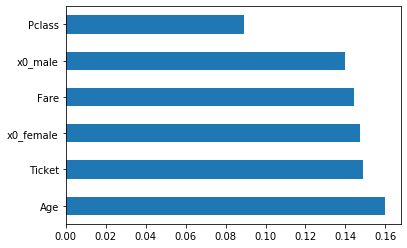

In [65]:
from sklearn.ensemble import ExtraTreesClassifier

X = train_new.drop(['PassengerId','Name'],axis = 1)
y = train.Survived
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
features_use = feat_importances.nlargest(6).index
feat_importances.nlargest(6).plot(kind='barh')
print(features_use)

## Construct the model

In [91]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [70]:
x_train = train_new.drop(['PassengerId','Name'],axis = 1)
x_train = x_train[features_use]
y_train = train["Survived"]
x_train, x_test, y_train ,y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)
print("x_train", len(x_train))
print("x_test", len(x_test))
print("y_train", len(y_train))
print("y_test", len(y_test))
print("test", len(test))

x_train 596
x_test 295
y_train 596
y_test 295
test 418


## Simple logistic regression
The validation result is 0.62 which is not so good.

In [71]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_logreg_train = round(logreg.score(x_train, y_train)*100,2)
acc_logreg_test = round(logreg.score(x_test, y_test)*100,2)
print("Training Accuracy: % {}".format(acc_logreg_train))
print("Testing Accuracy: % {}".format(acc_logreg_test))
test["Survived"] =  logreg.predict(test_new[features_use])

Training Accuracy: % 79.19
Testing Accuracy: % 80.68


## More advance - Hyperparameter Tuning - Grid Search - Cross Validation

In [92]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier(),
             BernoulliNB()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,30,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,5,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False, True],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,30,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
gaussian_NB_grid = {"alpha":[0.3,0.5,0.7,1.0]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   gaussian_NB_grid]

In [93]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 375 candidates, totalling 3750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 3750 out of 3750 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


0.8137853107344633
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 249 out of 280 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


0.6794915254237288
Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   47.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


0.8237570621468926
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s


0.7835593220338983
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.693050847457627
Fitting 10 folds for each of 4 candidates, totalling 40 fits
0.7820056497175141


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Text(0.5, 1.0, 'Cross Validation Scores')

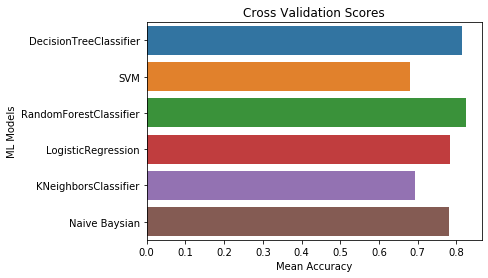

In [94]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier",
             "Naive Baysian"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

In [99]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("bb",best_estimators[5])
                                        ],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

0.823728813559322


In [100]:
test["Survived"] =  votingC.predict(test_new[features_use])
submission = test[["PassengerId","Survived"]]
submission.to_csv("sub_vc.csv",index = False)

## XGBoost

In [102]:
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# CV model
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 78.36% (4.30%)


In [104]:
model.fit(x_train, y_train)
test["Survived"] =  model.predict(test_new[features_use])
submission = test[["PassengerId","Survived"]]
submission.to_csv("sub_xgb.csv",index = False)